In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv("TSM_daily_data.csv")
print("Dimensiones del dataset :", df.shape)
df.head()

Dimensiones del dataset : (6786, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-10-09,5.646040,6.562691,5.646040,6.323565,3.191437,10201979
1,1997-10-10,7.014374,7.040944,6.363419,6.615830,3.338940,10669148
2,1997-10-13,6.629115,6.629115,6.443128,6.469698,3.265188,3044363
3,1997-10-14,6.416558,6.429843,6.031299,6.204002,3.131095,2549907
4,1997-10-15,5.818742,6.044584,5.805458,6.031299,3.043932,3167153


datos_x = [-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.1

Text(0.5, 1.0, 'Dataset generado')

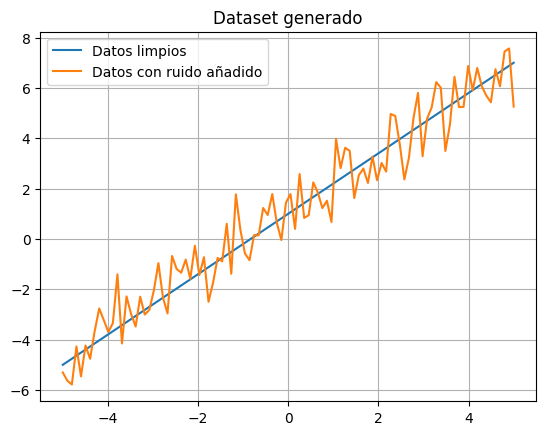

In [5]:
datos_x = np.linspace(-5, 5, 100) # 100 datos del -5 al 5
print("datos_x =", datos_x)

pendiente = 1.2
intersepto = 1

datos_y = datos_x * pendiente + intersepto

# agregar ruido a los datos
datos_y_ruido = np.random.normal(0,1,100) + datos_y
plt.plot(datos_x, datos_y)
plt.plot(datos_x, datos_y_ruido)
plt.legend(["Datos limpios", "Datos con ruido añadido"])
plt.grid()
plt.title("Dataset generado")

In [6]:
A = np.array([datos_x, np.ones(len(datos_x))]).T
b = datos_y_ruido
parametros_b = np.linalg.pinv(A).dot(b)
print("Los parámetros son: ", parametros_b)

Los parámetros son:  [1.16126166 1.08007461]


Text(0.5, 1.0, 'Modelo de regresión lineal')

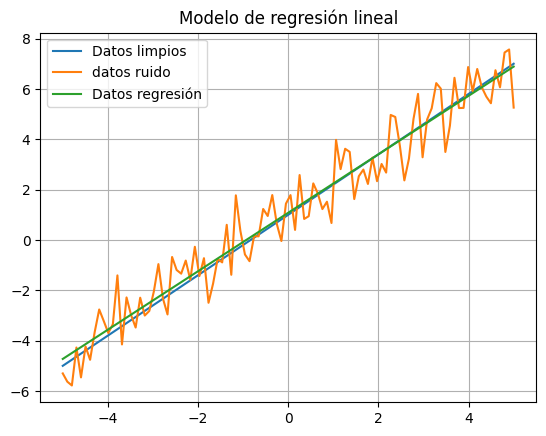

In [7]:
# A partir de los datos con ruido se puede crear un nuevo modelo que se ajuste minimizando el error cuadrático
plt.plot(datos_x, datos_y)
plt.plot(datos_x, datos_y_ruido)
plt.plot(datos_x, datos_x*parametros_b[0]+parametros_b[1])
plt.legend(["Datos limpios","datos ruido", "Datos regresión"])
plt.grid()
plt.title("Modelo de regresión lineal")

In [9]:
import sklearn
import seaborn as sns